## 假設檢定
### 美國總統的身高近40年(10屆)是否有比較高? 

In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [26]:
df = pd.read_csv('./president_heights.csv')
df.head(10)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [41]:
df2 = df.tail(10)
df2

,order,name,height(cm)
32,35,John F. Kennedy,183
33,36,Lyndon B. Johnson,193
34,37,Richard Nixon,182
35,38,Gerald Ford,183
36,39,Jimmy Carter,177
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [47]:
df1 = df.head(len(df) - 10)
df1

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [7]:
#two sample , 單尾 假設檢定
#虛無假設 H0 : U1 <=U2  H1 : U1 > U2

美國總統近10屆身高平均:184.6
美國總統扣除近10屆身高平均:178.21875
t-statistic:2.69562113651512
p-value:0.005113


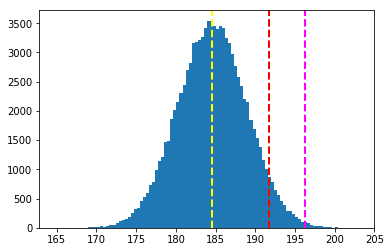

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

print("美國總統近10屆身高平均:" + str(df2['height(cm)'].mean()))
print("美國總統扣除近10屆身高平均:" + str(df1['height(cm)'].mean()))

# Independent T-Test
t,p = stats.ttest_ind(df2['height(cm)'],df1['height(cm)'])
#ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(df2['height(cm)'].mean(), df2['height(cm)'].std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, df2['height(cm)'].mean(), df2['height(cm)'].std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In [61]:
#檢定
if float(p1) < 0.05 :
    print("拒絕虛無假設，有顯著差異。")
else :
    print("不能拒絕虛無假設。")

拒絕虛無假設，有顯著差異。
